In [1]:
import numpy as np
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver

In [2]:
# set up solver
solver_config = dict(
    n=256,
    order=8,
    courant=0.8,
    snapshot_dt=1,
    num_snapshots=1,
)

# set up problem
problem_config = dict(
    u0="composite",
    x=(0, 1),
    v=1,
    PAD=(0, 1),
    bc="periodic",
)

# set up slope limiter
limiter_config = dict(
    apriori_limiting=True,
    mpp_lite=True,
    adaptive_stepsize=True,
    mpp_tolerance=1e-12,
    SED=True,
)

# execute solver
solver = AdvectionSolver(
    **solver_config,
    **problem_config,
    **limiter_config,
)
solver.rkorder()

# print mpp violations
solver.report_mpp_violations()


                       worst     frequency          mean
         upper   5.65143e-04   0.00000e+00              
         lower  -2.12347e-13   7.03364e-02              
         total  -2.12347e-13   7.03364e-02   4.63133e-13



Plot solution

Text(0, 0.5, '$\\overline{u}$')

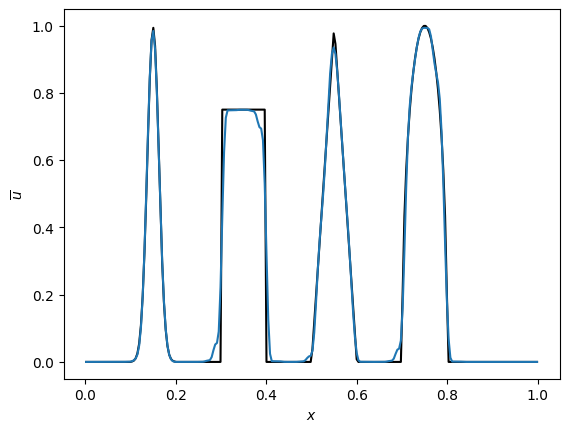

In [3]:
fig, ax = plt.subplots()
solver.plot_slice(ax, i=0, color="k")
solver.plot_slice(ax)
plt.xlabel("$x$")
plt.ylabel("$\overline{u}$")

Plot $1-\theta$ for _a priori_ slope limiting

Text(0, 0.5, '$\\Theta$')

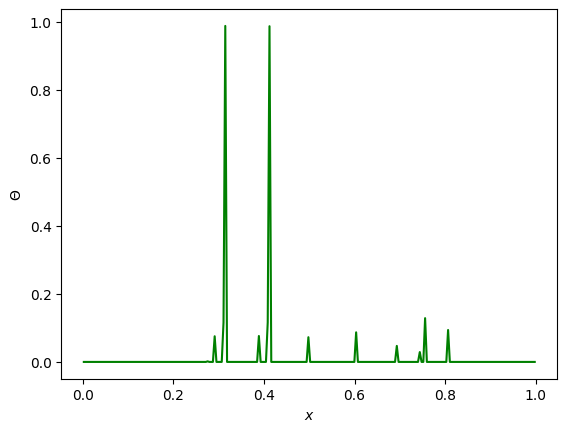

In [4]:
fig, ax = plt.subplots()
solver.plot_slice(ax, mode="theta", color="green", tolerance=1e-3)
plt.xlabel("$x$")
plt.ylabel("$\Theta$")

Plot troubled cell inditator for _a posteriori_ slope limiting

Text(0, 0.5, 'Troubled cell indication')

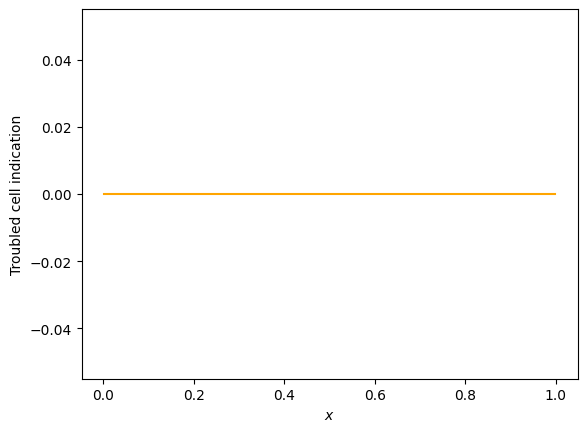

In [5]:
fig, ax = plt.subplots()
solver.plot_slice(ax, mode="trouble", color="orange")
plt.xlabel("$x$")
plt.ylabel("Troubled cell indication")